# Lab 4
Mayank Shouche, ms73656

Daniel Li, ddl933

Sunny Kharel, sk37963 

### Problem 1: Logistic Regression and CIFAR-10.  In this problem you will explore the dataset CIFAR-10, and you will use multinomial (multi-label) Logistic Regression to try to classify it.  You will also explore visualizing the solution.

#### Use  the fetch_openml command  from sklearn.datasets to  import  the  CIFAR-10-Small data set.

In [ ]:
from sklearn.datasets import fetch_openml

dataset = fetch_openml('CIFAR_10_small')

#### Figure out how to display some of the images in this data set, and display a couple.  While not high resolution, these should be recognizable if you are doing it correctly.

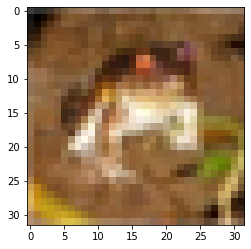

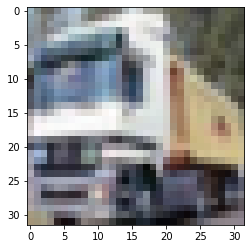

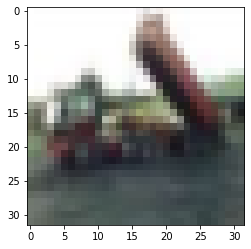

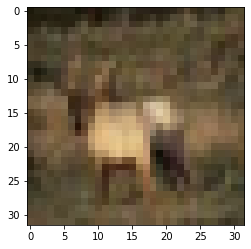

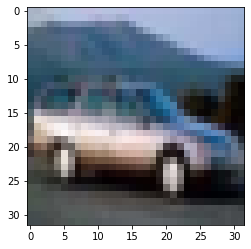

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


for i in range(5):
    plt.figure(i)
    
    img_raw = dataset['data'][i]
    r = img_raw[0:1024].reshape(32, 32)/255.0
    g = img_raw[1024:2048].reshape(32, 32)/255.0
    b = img_raw[2048:].reshape(32, 32)/255.0

    img = np.dstack((r, g, b))

    plt.imshow(img)


#### There are 20,000 data points.  Do a train-test split on 3/4 - 1/4.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dataset['data'], dataset['target'], test_size=0.25)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(15000, 3072) (5000, 3072) (15000,) (5000,)


#### You will run multi-class logistic regression on these using the cross entropy loss.  You have to specify this specifically (multiclass=’multinomial’).  Use cross validation to see how good your accuracy can be.  In this case, cross validate to find as good regularization coefficients as you can, for l1 and l2 regularization (called penalties), which are naturally supported in sklearn.linearmodel.LogisticRegression.  I recommend you use the solver saga.

In [ ]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import log_loss

model_l1 = LogisticRegressionCV(solver='saga', 
                             multi_class='multinomial', 
                             n_jobs=-1, 
                             tol=0.1, 
                             penalty='l1', 
                             scoring='neg_log_loss').fit(X_train, y_train)

model_l2 = LogisticRegressionCV(solver='saga', 
                             multi_class='multinomial', 
                             n_jobs=-1, 
                             tol=0.1, 
                             penalty='l2', 
                             scoring='neg_log_loss').fit(X_train, y_train)

In [ ]:
print('l1 coef:', 1/model_l1.C_[0])
print('l2 coef:', 1/model_l2.C_[0])

l1 coef: 0.3593813663804626
l2 coef: 166.81005372000593


#### Report your training and test loss from above.

In [ ]:
print("Train w/ l1:", np.abs(model_l1.score(X_train, y_train)))
print("Test w/ l1:", np.abs(model_l1.score(X_test, y_test)))

print("Train w/ l2:", np.abs(model_l2.score(X_train, y_train)))
print("Test w/ l2:", np.abs(model_l2.score(X_test, y_test)))

Train w/ l1: 1.6296040666090694
Test w/ l1: 1.762818066401256
Train w/ l2: 1.6341026544055688
Test w/ l2: 1.772966737275393


#### How sparse can you make your solutions without deteriorating your testing error too much? Here, we ask for a sparse solution that has test accuracy that is close to the best solution you found.

In [ ]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import log_loss

regs = [1e-5, 5e-4, 1e-3, 5e-3, 1e-2, 1e-1, 1]
for reg in regs:
    sparse_model = LogisticRegressionCV(solver='saga', 
                                      multi_class='multinomial', 
                                      n_jobs=-1, 
                                      tol=0.1, 
                                      penalty='l1', 
                                      Cs=[reg]).fit(X_train, y_train)
    sparse_model.scoring = 'neg_log_loss'
    print(reg, np.abs(sparse_model.score(X_test, y_test)))

1e-05 2.3025850950869753
0.0005 1.7767636930883317
0.001 1.7676368653290497
0.005 1.761947968320324
0.01 1.768226351513758
0.1 1.763062933403209
1 1.765298939611872


In [ ]:
from sklearn.linear_model import LogisticRegression
most_sparse_model = LogisticRegression(solver='saga', 
                                       multi_class='multinomial', 
                                       n_jobs=-1, 
                                       tol=0.1, 
                                       penalty='l1', 
                                       C=0.0005).fit(X_train, y_train)
print(most_sparse_model.coef_.shape)

(10, 3072)


In [27]:
zeros = np.sum([1 for x in most_sparse_model.coef_.flatten() if x == 0])
print(f'Sparsity: {zeros/3072:.2f}%')

Sparsity: 1.15%


Looks like we can go as high as ${1/0.0005} = 2000$ for $\ell1$ regularization coefficient while not really sacrificing anything in terms of log-loss.

### Problem 2: Multi-class Logistic Regression – Visualizing the Solution

In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import numpy as np

In [ ]:

train_samples = 5000
test_samples = 10000


X, y = fetch_openml('mnist_784', version=1, return_X_y=True)


/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_samples, test_size=test_samples)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression

'''
Note that ‘sag’ and ‘saga’ fast convergence is only guaranteed on features with approximately the same scale. 
You can preprocess the data with a scaler from sklearn.preprocessing.
'''

'''
tol: the min change in update until optimization stops
'''

'''
C = 1/lambda, inverse regularization
'''



LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='saga', tol=0.01, verbose=0,
                   warm_start=False)

In [ ]:
clf1 = LogisticRegression(C=50. / train_samples, solver='saga', tol=0.01, multi_class='multinomial')
clf1.fit(X_train,y_train)

sparsity = np.mean(clf1.coef_ == 0) * 100
score = clf1.score(X_test, y_test)

print("Sparsity with Cross-entropy penalty: %.2f%%" % sparsity)
print("Test score with Cross Entroy]py penalty: %.4f" % score)

Sparsity with L1 penalty: 16.45%
Test score with L1 penalty: 0.8955


# Cross Entropy Loss without L1 Regularization

In [ ]:
clf1 = LogisticRegression(solver='saga', tol=0.01, multi_class='multinomial')
clf1.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='saga', tol=0.01, verbose=0,
                   warm_start=False)

In [ ]:
sparsity = np.mean(clf1.coef_ == 0) * 100
train_score = clf1.score(X_train, y_train)
test_score = clf1.score(X_test, y_test)

print("Sparsity with Cross-entropy loss: %.2f%%" % sparsity)
print("Train score with Cross Entropy loss: %.4f"% train_score)
print("Test score with Cross Entropy loss: %.4f" % test_score)

Sparsity with Cross-entropy loss: 16.45%
Train score with Cross Entropy loss: 0.9482
Test score with Cross Entropy loss: 0.8984


**Attempting to tune hyperparameters**

In [ ]:
## tune on solver and tol
from sklearn.model_selection import GridSearchCV
clf_init = LogisticRegression(multi_class='multinomial')

param_test_tol = {
    'tol':[0.1, 0.01, 0.001, 0.0001],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}
grid_search = GridSearchCV(estimator = clf_init,
                           param_grid = param_test_tol,
                           scoring='neg_log_loss', #neg_log_loss == cross-entropy
                           cv=5,
                           verbose=0)

In [ ]:
grid_search.fit(X_train, y_train)

/home/sunny/fall_2020/ee460j/dslabenv/lib/python3.5/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/sunny/fall_2020/ee460j/dslabenv/lib/python3.5/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org

/home/sunny/fall_2020/ee460j/dslabenv/lib/python3.5/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/sunny/fall_2020/ee460j/dslabenv/lib/python3.5/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org

/home/sunny/fall_2020/ee460j/dslabenv/lib/python3.5/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/sunny/fall_2020/ee460j/dslabenv/lib/python3.5/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/sunny/fall_2020/ee460j/dslabenv/lib/python3.5/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/sunny/fall_2020/ee460j/dslabenv/lib/python3.5/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/sunny/fall_2020/ee460j/dslabenv/lib/python3.5/site

NameError: name 'gsearch1' is not defined

In [ ]:
grid_search.best_params_, grid_search.best_score_

({'solver': 'saga', 'tol': 0.001}, -0.3475164287665922)

In [ ]:
clf_best_params = LogisticRegression(solver='saga', multi_class='multinomial', tol=0.001)
clf_best_params.fit(X_train, y_train)
clf_best_params.score(X_test, y_test)


/home/sunny/fall_2020/ee460j/dslabenv/lib/python3.5/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


0.8991

In [ ]:
grid_search_score = clf_best_params.score(X_test, y_test)

print("Test score before tuning: {}, test score after tuning: {}".format(test_score, grid_search_score))
print("Score increase {}".format(grid_search_score-test_score))

Test score before tuning: 0.8984, test score after tuning: 0.8991
Score increase 0.0007000000000000339


# **Cross Entropy Loss with L1 Regularization**

In [ ]:
param_l1_reg = {
    'C':[10, 50, 100, 200, 400, 1000, 2000, 100000],
}
clf_l1_reg_estimator = LogisticRegression(solver='saga', multi_class='multinomial', tol=0.001, penalty='l1')
grid_search_l1_reg = GridSearchCV(estimator = clf_l1_reg_estimator,
                           param_grid = param_l1_reg,
                           scoring='neg_log_loss', #neg_log_loss == cross-entropy
                           cv=5,
                           verbose=0)

In [ ]:
grid_search_l1_reg.fit(X_train, y_train)

/home/sunny/fall_2020/ee460j/dslabenv/lib/python3.5/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/sunny/fall_2020/ee460j/dslabenv/lib/python3.5/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/sunny/fall_2020/ee460j/dslabenv/lib/python3.5/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/sunny/fall_2020/ee460j/dslabenv/lib/python3.5/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/sunny/fall_2020/ee460j/dslabenv/lib/python3.5/site

/home/sunny/fall_2020/ee460j/dslabenv/lib/python3.5/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/sunny/fall_2020/ee460j/dslabenv/lib/python3.5/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/sunny/fall_2020/ee460j/dslabenv/lib/python3.5/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/sunny/fall_2020/ee460j/dslabenv/lib/python3.5/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/sunny/fall_2020/ee460j/dslabenv/lib/python3.5/site

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100,
                                          multi_class='multinomial',
                                          n_jobs=None, penalty='l1',
                                          random_state=None, solver='saga',
                                          tol=0.001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [10, 50, 100, 200, 400, 1000, 2000, 100000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_log_loss', verbose=0)

In [ ]:
grid_search_l1_reg.best_params_, grid_search_l1_reg.best_score_

({'C': 10}, -0.34736907065081774)

In [ ]:
clf_params_l1_reg = LogisticRegression(solver='saga', multi_class='multinomial', tol=0.001, C=10, penalty='l1', max_iter=100)
clf_params_l1_reg.fit(X_train, y_train)
regularization_score = clf_params_l1_reg.score(X_test, y_test)
regularization_score

/home/sunny/fall_2020/ee460j/dslabenv/lib/python3.5/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


0.8991

In [ ]:
sparsity_l1_reg = np.mean(clf2.coef_ == 0) * 100
regularization_score_train = clf_params_l1_reg.score(X_train, y_train)
regularization_score = clf_params_l1_reg.score(X_test, y_test)

print("Sparsity with Cross-entropy loss: %.2f%%" % sparsity_l1_reg)
print("Train score with Tuned-Cross Entropy loss and L1 Regularization: %.4f"% regularization_score_train)
print("Test score with Tuned-Cross Entropy loss and L1 Regularization: %.4f" % regularization_score)

Sparsity with Cross-entropy loss: 91.22%
Train score with Tuned-Cross Entropy loss and L1 Regularization: 0.9596
Test score with Tuned-Cross Entropy loss and L1 Regularization: 0.8991


**Achieved the same score with l1 regularization**

# Pretend that the coefficients of the solution are an image of the same dimension, and plot it.


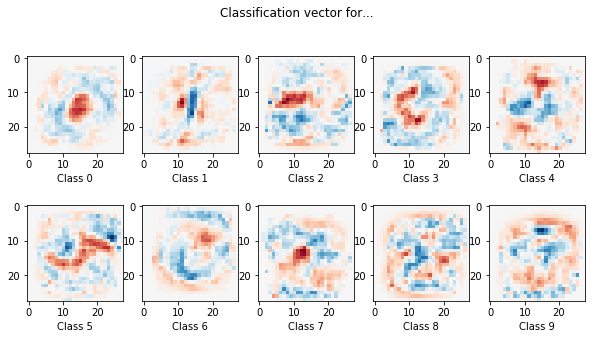

In [ ]:
import matplotlib.pyplot as plt

coef = clf_params_l1_reg.coef_.copy()
plt.figure(figsize=(10, 5))
scale = np.abs(coef).max()
for i in range(10):
    l1_plot = plt.subplot(2, 5, i + 1)
    l1_plot.imshow(coef[i].reshape(28, 28), interpolation='nearest',
                   cmap=plt.cm.RdBu, vmin=-scale, vmax=scale)
    l1_plot.set_xlabel('Class %i' % i)
plt.suptitle('Classification vector for...')

plt.show()

### Problem 3: Revisiting Logistic Regression and MNIST

In [9]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import numpy as np

train_samples = 5000
test_samples = 5000


X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_samples, test_size=test_samples)


**Performance without fine-tuning**


In [10]:
from sklearn.ensemble import RandomForestClassifier

base_classifier = RandomForestClassifier()
base_classifier.fit(X_train, y_train)
base_score = base_classifier.score(X_test, y_test)


In [11]:
print('Base score without fine tuning is: {}'.format(base_score))

Base score without fine tuning is: 0.9408


In [1]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
    'criterion':['gini','entropy'],
    'n_estimators':[500, 800, 1000, 1200, 1400, 1600, 1800, 2000]
}

gsearch = GridSearchCV(estimator = RandomForestClassifier(n_jobs = -1, max_features='sqrt'), param_grid = params, scoring='accuracy', cv=5, verbose = 4)
gsearch.fit(X_train, y_train)


#Run on colab for 4 hours

In [ ]:
Best scoring group of hyper parameters

#[CV]  criterion=gini, max_depth=60, n_estimators=1000, score=0.959, total=  12.4s
#[CV]  criterion=entropy, max_depth=30, n_estimators=1000, score=0.958, total=  10.8s



In [18]:
# winner_rcf = RandomForestClassifier(n_jobs = -1, max_features='sqrt', criterion='gini', max_depth=60, n_estimators=1000)
# winner_rcf.fit(X_train, y_train)
score = winner_rcf.score(X_test, y_test)

print('Score of {} after tuning hyperparameters'.format(score))

Score of 0.9458 after tuning hyperparameters


In [22]:
winner_rcf1 = RandomForestClassifier(n_jobs = -1, max_features='sqrt', criterion='entropy', max_depth=30, n_estimators=1000)
winner_rcf1.fit(X_train, y_train)
score2 = winner_rcf1.score(X_test, y_test)

print('Score of {} after tuning hyperparameters'.format(score2))

Score of 0.9452 after tuning hyperparameters


# Now using Gradient Boosting

In [16]:
from scipy import stats
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score,roc_auc_score
from sklearn.model_selection import KFold

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import numpy as np

In [15]:
train_samples = 5000
test_samples = 10000


X, y = fetch_openml('mnist_784', version=1, return_X_y=True)


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_samples, test_size=test_samples)

# Run on colab

In [23]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
import warnings

clf_xgb = xgb.XGBClassifier(debug=2, colsample_bytree=0.8)

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test)






param_dist = {'n_estimators': stats.randint(150, 1000),
              'learning_rate': stats.uniform(0.01, 0.6),
             'max_depth': [3, 4, 5, 6, 7, 8, 9],
             }
clf = RandomizedSearchCV(clf_xgb, 
                         param_distributions = param_dist,
                         cv = 5,  
                         n_iter = 10,  
                         scoring = 'accuracy', 
                         error_score = 0, 
                         verbose = 3, 
                         n_jobs = -1)
warnings.filterwarnings("ignore")
clf.fit(X_train, y_train)


best parameters after running on colab were the parameters as follows:


n_estimators=1000, max_depth=5, learning_rate=0.3

In [12]:
best_clf = xgb.XGBClassifier(n_estimators=1000, colsample_bytree=0.8, learning_rate=0.3)
best_clf.fit(X_train,y_train)
score = best_clf.score(X_test, y_test)

In [25]:
print('Score on gradient boosted model {}'.format(score))

Score on gradient boosted model 0.9493


# 
# 

# Problem 4: Revisiting Logistic Regression and CIFAR-10. As before, we’ll throw the kitchen sink of classical ML (i.e.  pre-deep learning) on CIFAR-10.  Keep in mind that CIFAR-10 is a few times larger.

What is the best accuracy you can get on the test data, by tuning Random Forests?  What are the hyperparameters of your best model?

In [1]:
from sklearn.datasets import fetch_openml
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split

dataset = fetch_openml('CIFAR_10_small')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dataset['data'], dataset['target'], test_size=0.25)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(15000, 3072) (5000, 3072) (15000,) (5000,)


In [ ]:
random_grid = {
    'n_estimators': [int(x) for x in np.arange(50, 300, 10)],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [int(x) for x in np.arange(50, 300, 10)] + [None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

r = RandomForestClassifier()

model = RandomizedSearchCV(estimator=r, param_distributions=random_grid, n_iter=100, cv=3, verbose=2, n_jobs=-1)
model.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 33.8min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 66.7min finished


KeyboardInterrupt: 

In [ ]:
model.best_params_

{'n_estimators': 250,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 180,
 'bootstrap': False}

In [ ]:
best_model = RandomForestClassifier(n_estimators= 250,
                                    min_samples_split= 5,
                                    min_samples_leaf= 2,
                                    max_features= 'auto',
                                    max_depth= 180,
                                    bootstrap= False, 
                                    random_state= 42).fit(X_train, y_train)

baseline_model = RandomForestClassifier(random_state=42).fit(X_train, y_train)

In [ ]:
from sklearn.metrics import confusion_matrix, roc_auc_score, classification_report, log_loss

best_pred = best_model.predict(X_test)
baseline_pred = baseline_model.predict(X_test)
print('Tuned AUC:\n', confusion_matrix(y_test, best_pred),'\n\n', 
      'Baseline AUC:\n', confusion_matrix(y_test, baseline_pred))

print('\n\nTuned AUC:\n', classification_report(y_test, best_pred),'\n\n', 
      'Baseline AUC:\n', classification_report(y_test, baseline_pred))

best_pred_proba = best_model.predict_proba(X_test)
baseline_pred_proba = baseline_model.predict_proba(X_test)

print('\n\nTuned AUC: (auc, log_loss)', roc_auc_score(y_test, best_pred_proba, multi_class='ovr'), 
      ',', log_loss(y_test, best_pred_proba))
print('Baseline AUC: (auc, log_loss)', roc_auc_score(y_test, baseline_pred_proba, multi_class='ovr'), 
      ',', log_loss(y_test, baseline_pred_proba))

Tuned AUC:
 [[274  28  16  12  21  10  13  14  78  19]
 [ 15 262   3  13  14  16  11  24  24 103]
 [ 70  33 148  52  85  36  67  37  19  13]
 [ 29  15  35 136  40  89  77  25  15  42]
 [ 37   6  52  17 199  25  66  46  11  13]
 [ 17  16  25  66  37 187  44  32  15  22]
 [ 13  20  32  35  69  30 292  13   3  16]
 [ 28  27  16  25  78  47  21 214  11  47]
 [ 56  44   7   7   9  21  10  11 315  40]
 [ 21  59   4  16   7  12  13  16  31 298]] 

 Baseline AUC:
 [[271  31  19   5  23  10  13  13  76  24]
 [ 17 248   3  20  16  14  17  24  32  94]
 [ 74  31 138  39  91  35  73  37  21  21]
 [ 35  19  39 127  54  81  70  31   9  38]
 [ 37   6  67  29 195  22  56  34  16  10]
 [ 20  23  38  81  39 161  43  18  11  27]
 [ 15  20  43  43  83  33 247  13   5  21]
 [ 29  23  27  28  87  55  26 187  11  41]
 [ 55  43   9  13  10  17   5  14 317  37]
 [ 24  67   3  15   6  17  17  18  40 270]]


Tuned AUC:
               precision    recall  f1-score   support

           0       0.49      0.56      

Looks like, on average, the hyperparameter-tuned model performs slightly better than the baseline, with an accuracy of .47 vs .43, and better precision and recalls.

What  is  the  best  accuracy  you  can  get  on  the  test  data,  by  tuning  any  model  including Gradient boosting?  What are the hyperparameters of your best model?

In [3]:
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, roc_auc_score, classification_report, log_loss
from sklearn.datasets import fetch_openml
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split

dataset = fetch_openml('CIFAR_10_small')

X_train, X_test, y_train, y_test = train_test_split(dataset['data'], dataset['target'], test_size=0.25)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

X_train /= 255.
X_test /= 255.

(15000, 3072) (5000, 3072) (15000,) (5000,)


In [20]:
from sklearn.model_selection import RandomizedSearchCV, KFold
from scipy import stats
import numpy as np

param_dist = {'n_estimators': stats.randint(150, 500),
              'learning_rate': stats.uniform(0.01, 0.07),
              'subsample': stats.uniform(0.3, 0.7),
              'max_depth': [3, 4, 5, 6, 7, 8, 9],
              'colsample_bytree': stats.uniform(0.5, 0.45),
              'min_child_weight': [1, 2, 3]
             }

model = xgb.XGBClassifier()
rnd_search = RandomizedSearchCV(model, 
                                param_distributions=param_dist, 
                                n_iter=3,
                                cv=2,
                                verbose=5,  
                                n_jobs = -1)

rnd_search.fit(X_train, y_train, verbose=5)

Fitting 2 folds for each of 3 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed: 42.5min remaining: 42.5min
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed: 65.8min finished


KeyboardInterrupt: 

In [21]:
rnd_search.best_params_

{'colsample_bytree': 0.5379282694060158,
 'learning_rate': 0.07096741825751023,
 'max_depth': 7,
 'min_child_weight': 2,
 'n_estimators': 491,
 'subsample': 0.8877151910953791}

In [26]:
best_model = xgb.XGBClassifier()
best_model.set_params(**rnd_search.best_params_)
best_model.fit(X_train, y_train)

prediction = best_model.predict(X_test)

print(classification_report(y_test, prediction))
print(confusion_matrix(y_test, prediction))

              precision    recall  f1-score   support

           0       0.57      0.62      0.60       486
           1       0.65      0.58      0.61       495
           2       0.46      0.40      0.43       506
           3       0.37      0.33      0.35       520
           4       0.45      0.46      0.45       482
           5       0.44      0.41      0.43       474
           6       0.48      0.67      0.56       477
           7       0.65      0.58      0.61       546
           8       0.63      0.69      0.66       526
           9       0.58      0.57      0.57       488

    accuracy                           0.53      5000
   macro avg       0.53      0.53      0.53      5000
weighted avg       0.53      0.53      0.53      5000

[[302   8  17  13  10  11   9  12  83  21]
 [ 18 286   8  15   9   3  22  13  40  81]
 [ 51  12 202  46  59  35  53  26  16   6]
 [ 13  13  41 171  45  92  87  21  18  19]
 [ 24   2  77  26 220  16  64  38   7   8]
 [ 14   6  35  93  31 196 

We were definitely able to obtain a better score using a tuned xgboost model. Accuracy on the test set got to 0.53, versus the 0.47 we got from tuned random forests.

In [1]:
%matplotlib inline

### Problem 5: Getting Started with Pytorch

### Loading MNIST Dataset

(50000, 784)


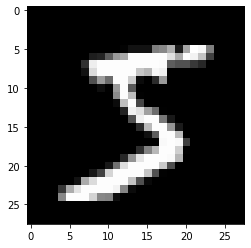

In [2]:
# Loading Dataset libraries
from pathlib import Path
import requests
import pickle
import gzip
# Computional and Graphical libraries
from matplotlib import pyplot
import numpy as np
import torch
# Debugger Library
from IPython.core.debugger import set_trace

DATA_PATH = Path("data")
PATH = DATA_PATH / "mnist"

PATH.mkdir(parents=True, exist_ok=True)

URL = "http://deeplearning.net/data/mnist/"
FILENAME = "mnist.pkl.gz"

if not (PATH / FILENAME).exists():
        content = requests.get(URL + FILENAME).content
        (PATH / FILENAME).open("wb").write(content)

with gzip.open((PATH / FILENAME).as_posix(), "rb") as f:
        ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding="latin-1")
  
pyplot.imshow(x_train[0].reshape((28, 28)), cmap="gray")
print(x_train.shape)

x_train, y_train, x_valid, y_valid = map(
    torch.tensor, (x_train, y_train, x_valid, y_valid)
)

### Is GPU availble?

In [3]:
print(torch.cuda.is_available())
dev = torch.device(
    "cuda") if torch.cuda.is_available() else torch.device("cpu")

True


### Classes and Functions

In [4]:
# Training and Validation Datasets/DataLoaders Libraries
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
# Optim and NN libraries
from torch import optim
from torch import nn
import torch.nn.functional as F

def get_data(train_ds, valid_ds, bs):
    return (
        DataLoader(train_ds, batch_size=bs, shuffle=True),
        DataLoader(valid_ds, batch_size=bs * 2),
    )

loss_func = F.cross_entropy

def loss_batch(model, loss_func, xb, yb, opt=None):
    loss = loss_func(model(xb), yb)

    if opt is not None:
        loss.backward()
        opt.step()
        opt.zero_grad()

    return loss.item(), len(xb)

def fit(epochs, model, loss_func, opt, train_dl, valid_dl):
    for epoch in range(epochs):
        model.train()
        for xb, yb in train_dl:
            loss_batch(model, loss_func, xb, yb, opt)

        model.eval()
        with torch.no_grad():
            losses, nums = zip(
                *[loss_batch(model, loss_func, xb, yb) for xb, yb in valid_dl]
            )
        val_loss = np.sum(np.multiply(losses, nums)) / np.sum(nums)
        val_acc = sum(accuracy(model(xb), yb) for xb, yb in valid_dl)    #valid_loss / len(valid_dl)

        val_acc = val_acc.cpu().detach().numpy() 
        print(epoch, val_loss, val_acc / len(valid_dl))

class Lambda(nn.Module):
    def __init__(self, func):
        super().__init__()
        self.func = func

    def forward(self, x):
        return self.func(x)

def preprocess(x, y):
    return x.view(-1, 1, 28, 28).to(dev), y.to(dev)

class WrappedDataLoader:
    def __init__(self, dl, func):
        self.dl = dl
        self.func = func

    def __len__(self):
        return len(self.dl)

    def __iter__(self):
        batches = iter(self.dl)
        for b in batches:
            yield (self.func(*b))

# Accuracy check from Validation Test.
def accuracy(out, yb):
    preds = torch.argmax(out, dim=1)
    return (preds == yb).float().mean()

### Initial Variables

In [5]:
bs = 64  # batch size
lr = 0.1  # learning rate
epochs = 2  # how many epochs to train for
a = np.zeros((20, 10), dtype=(float,5))

### Training and Validation Datasets/DataLoaders 


In [6]:
train_ds = TensorDataset(x_train, y_train)
valid_ds = TensorDataset(x_valid, y_valid)
train_dl, valid_dl = get_data(train_ds, valid_ds, bs)
train_dl = WrappedDataLoader(train_dl, preprocess)
valid_dl = WrappedDataLoader(valid_dl, preprocess)

### Model and Optim (Use to do Foward Step)

In [7]:
model = nn.Sequential(
    nn.Conv2d(1, 16, kernel_size=3, stride=2, padding=1),
    nn.ReLU(),
    nn.Conv2d(16, 16, kernel_size=3, stride=2, padding=1),
    nn.ReLU(),
    nn.Conv2d(16, 10, kernel_size=3, stride=2, padding=1),
    nn.ReLU(),
    nn.AdaptiveAvgPool2d(1),
    Lambda(lambda x: x.view(x.size(0), -1)),
)
model.to(dev)
opt = optim.SGD(model.parameters(), lr=lr, momentum=0.9)

### Training of Model. Outputs Validation Loss.


In [8]:
fit(epochs, model, loss_func, opt, train_dl, valid_dl)

0 0.339774385368824 0.8920094936708861
1 0.21009030851125718 0.9386867088607594


### Testing different learning rate and momentum values.


In [10]:
def fit(epochs, model, loss_func, opt, train_dl, valid_dl, mat, lr, momentum):
    for epoch in range(epochs):
        model.train()
        for xb, yb in train_dl:
            loss_batch(model, loss_func, xb, yb, opt)

        model.eval()
        with torch.no_grad():
            losses, nums = zip(
                *[loss_batch(model, loss_func, xb, yb) for xb, yb in valid_dl]
            )

        val_loss = np.sum(np.multiply(losses, nums)) / np.sum(nums)
        val_acc = sum(accuracy(model(xb), yb) for xb, yb in valid_dl)    #valid_loss / len(valid_dl)
        val_acc = val_acc.cpu().detach().numpy() / len(valid_dl)
        mat_data = (epoch, lr, momentum, val_loss, val_acc)
        mat[int(((lr*20)-2)+epoch)][int(momentum*10)] = mat_data
        print(epoch, val_loss, val_acc)
    return mat
################################################################################
model = nn.Sequential(
    nn.Conv2d(1, 16, kernel_size=3, stride=2, padding=1),
    nn.ReLU(),
    nn.Conv2d(16, 16, kernel_size=3, stride=2, padding=1),
    nn.ReLU(),
    nn.Conv2d(16, 10, kernel_size=3, stride=2, padding=1),
    nn.ReLU(),
    nn.AdaptiveAvgPool2d(1),
    Lambda(lambda x: x.view(x.size(0), -1)),
)
model.to(dev)
for x in range(10):           # Varying for LR from 0.1 to 1.0  
  lr = (x+1)/10
  for y in range(10):         # Varying for Momentum 0.0 to 0.9
    momentum = y/10
    opt = optim.SGD(model.parameters(), lr=lr, momentum=momentum)
    print(lr, momentum)
    a = fit(epochs, model, loss_func, opt, train_dl, valid_dl, a, lr, momentum)


0.1 0.0
0 1.4863000289916992 0.45905854430379744
1 1.1271489278793334 0.6269778481012658
0.1 0.1
0 0.6791762075424195 0.7776898734177216
1 0.6144604323863984 0.7991495253164557
0.1 0.2
0 0.3710880497455597 0.8862737341772152
1 0.37908401839733125 0.8816257911392406
0.1 0.3
0 0.2817768128156662 0.9165348101265823
1 0.2684560010433197 0.9212816455696202
0.1 0.4
0 0.25333035026788714 0.9282041139240507
1 0.2586450876951218 0.9212816455696202
0.1 0.5
0 0.4873069658279419 0.8554193037974683
1 0.28710642221570015 0.912381329113924
0.1 0.6
0 0.24276638667583467 0.9288963607594937
1 0.18893379352390766 0.9445213607594937
0.1 0.7
0 0.22176867967247962 0.9373022151898734
1 0.19824675492346286 0.9425435126582279
0.1 0.8
0 0.18635324544012546 0.9465981012658228
1 0.1841644081056118 0.9479825949367089
0.1 0.9
0 0.16314728631675243 0.9553006329113924
1 0.18670903607010841 0.9434335443037974
0.2 0.0
0 0.18890684643387795 0.9449169303797469
1 0.13567996456772088 0.9623219936708861
0.2 0.1
0 0.13560908

### Graphical Illustration of Accuracy for Varying Values of Learning Rate and Momentum

In [11]:
def Largest_Moment(mat, index):
  best_Momentum_index = 0;
  for x in range(10):
    if(mat[index][x][4] > mat[index][best_Momentum_index][4]):
      best_Momentum_index = x
  return best_Momentum_index

mat_lr = np.zeros(20)
mat_moment = np.zeros(20)
mat_acc = np.zeros(20)

for i in range(20):
  mat_lr[i] = a[i][0][1]
  # Momentum index with greatest Accuracy of a given LR.
  large = Largest_Moment(a, i)
  mat_moment[i] = a[i][large][2]
  mat_acc[i] = a[i][large][4]

The arrays of LR, Momentum, and Accuracy should be counted in groups of 2. First Value is epoch 1, second value is epoch 2. Then LR/Momentum will increment. For example, below we see that the 8th value in accuracy array is the largest. This corresponds to a learning rate of 0.5 and momentum 0.4 and epoch 1. Loss of valiation sets are also shown as 0.9500714. 

In [15]:
print(mat_acc)
print(mat_moment[10])
print(a[10][3])

[0.95530063 0.94798259 0.96538766 0.96578323 0.97102453 0.96924446
 0.97053006 0.9726068  0.97092563 0.97072785 0.97329905 0.97211234
 0.96835443 0.96805775 0.96716772 0.96657437 0.95500396 0.95549842
 0.95253165 0.95213608]
0.3
[0.         0.6        0.3        0.10774975 0.97329905]


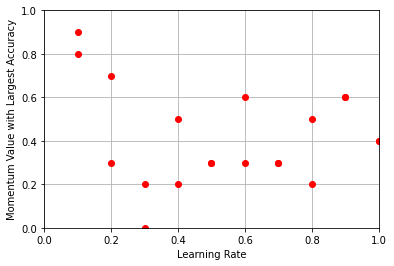

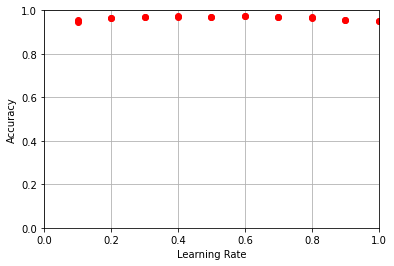

In [13]:
fig, ax = pyplot.subplots()
ax.plot(mat_lr, mat_moment, 'ro')
ax.axis([0, 1, 0, 1])
ax.set(xlabel='Learning Rate', ylabel='Momentum Value with Largest Accuracy')
ax.grid()
pyplot.show()

fig, ax = pyplot.subplots()
ax.plot(mat_lr, mat_acc, 'ro')
ax.axis([0, 1, 0, 1])
ax.set(xlabel='Learning Rate', ylabel='Accuracy')
ax.grid()
pyplot.show()

From the plot above. We got our best accuracy, 0.97329905 , with a learning rate of 0.6 and a momentum of 0.3. In the graphs above, every LR has two dots since there is 2 epochs.

### Problem 6: CNNs for CIFAR-10

*   Build a CNN and optimize the accuracy for CIFAR-10. Try different number of layers and different architectures (depth and convolutional filter hyperparameters).
*   Is momentum and learning rate having a significant effect? Track the train and test loss across training epochs and plot them for different learning rates and momentum values.
*   Is the depth of the CNN having a significant effect on performance? Describe the hyperparameters of the best model you could train.

### Loading CIFAR-10 Dataset

In [2]:
# Loading Dataset libraries
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
# Computional and Graphical libraries
from matplotlib import pyplot
import numpy as np
import torch
# Debugger Library
from IPython.core.debugger import set_trace

# The CIFAR-10 Dataset loading steps are just from our Q.1
dataset = fetch_openml('CIFAR_10_small')

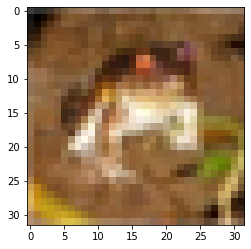

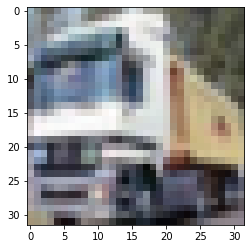

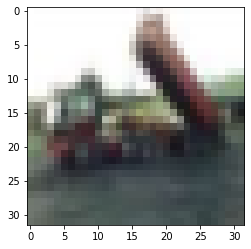

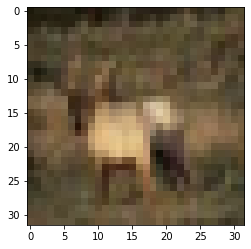

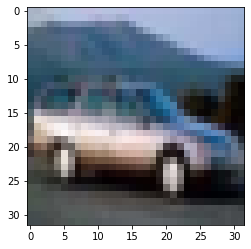

In [3]:
# Some images to make sure we loaded correctly
for i in range(5):
    pyplot.figure(i)
    
    img_raw = dataset['data'][i]
    r = img_raw[0:1024].reshape(32, 32)/255.0
    g = img_raw[1024:2048].reshape(32, 32)/255.0
    b = img_raw[2048:].reshape(32, 32)/255.0

    img = np.dstack((r, g, b))

    pyplot.imshow(img)

In [4]:
x_train, x_valid, y_train, y_valid = train_test_split(dataset['data'], dataset['target'], test_size=0.25)
y_train = y_train.astype(int)
y_valid = y_valid.astype(int)
x_train = x_train/255.0
x_valid = x_valid/255.0
x_train, y_train, x_valid, y_valid = map(torch.tensor, (x_train, y_train, x_valid, y_valid))

### Is GPU availble?


In [5]:
print(torch.cuda.is_available())
dev = torch.device(
    "cuda") if torch.cuda.is_available() else torch.device("cpu")

True


### Classes and Functions

In [6]:
# Training and Validation Datasets/DataLoaders Libraries
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
# Optim and NN libraries
from torch import optim
from torch import nn
import torch.nn.functional as F

def get_data(train_ds, valid_ds, bs):
    return (
        DataLoader(train_ds, batch_size=bs, shuffle=True),
        DataLoader(valid_ds, batch_size=bs * 2),
    )

loss_func = F.cross_entropy

def loss_batch(model, loss_func, xb, yb, opt=None):
    loss = loss_func(model(xb), yb)

    if opt is not None:
        loss.backward()
        opt.step()
        opt.zero_grad()

    return loss.item(), len(xb)

def fit(epochs, model, loss_func, opt, train_dl, valid_dl):
    for epoch in range(epochs):
        model.train()
        for xb, yb in train_dl:
            loss_batch(model, loss_func, xb, yb, opt)

        model.eval()
        with torch.no_grad():
            losses, nums = zip(
                *[loss_batch(model, loss_func, xb, yb) for xb, yb in valid_dl]
            )
        val_loss = np.sum(np.multiply(losses, nums)) / np.sum(nums)
        val_acc = sum(accuracy(model(xb), yb) for xb, yb in valid_dl)    #valid_loss / len(valid_dl)

        val_acc = val_acc.cpu().detach().numpy() 
        print(epoch, val_loss, val_acc / len(valid_dl))

# Accuracy check from Validation Test.
def accuracy(out, yb):
    preds = torch.argmax(out, dim=1)
    return (preds == yb).float().mean()

class Lambda(nn.Module):
    def __init__(self, func):
        super().__init__()
        self.func = func

    def forward(self, x):
        return self.func(x)

def preprocess(x, y):
    return x.view(-1, 3, 32, 32).to(dev), y.to(dev)


class WrappedDataLoader:
    def __init__(self, dl, func):
        self.dl = dl
        self.func = func

    def __len__(self):
        return len(self.dl)

    def __iter__(self):
        batches = iter(self.dl)
        for b in batches:
            yield (self.func(*b))

### Initial Variables

In [7]:
bs = 64  # batch size
lr = 0.1  # learning rate
epochs = 2  # how many epochs to train for
a = np.zeros((20, 10), dtype=(float,5))

### Training and Validation Datasets/DataLoaders 


In [8]:
train_ds = TensorDataset(x_train, y_train)
valid_ds = TensorDataset(x_valid, y_valid)
train_dl, valid_dl = get_data(train_ds, valid_ds, bs)
train_dl = WrappedDataLoader(train_dl, preprocess)
valid_dl = WrappedDataLoader(valid_dl, preprocess)

### Original Model, Optim (Use to do Foward Step), and Training

In [9]:
model = nn.Sequential(
    nn.Conv2d(3, 16, kernel_size=3, stride=2, padding=1),
    nn.ReLU(),
    nn.Conv2d(16, 16, kernel_size=3, stride=2, padding=1),
    nn.ReLU(),
    nn.Conv2d(16, 10, kernel_size=3, stride=2, padding=1),
    nn.ReLU(),
    nn.AdaptiveAvgPool2d(1),
    Lambda(lambda x: x.view(x.size(0), -1)),
)
model.to(dev)
opt = optim.SGD(model.parameters(), lr=lr, momentum=0.9)
model = model.double()
fit(epochs, model, loss_func, opt, train_dl, valid_dl)

0 2.109213362124643 0.2107421875
1 2.0545586561993057 0.2380859375


### Training of Model. Outputs Validation Loss.


In [10]:
# 5 Conv Layers with just more fully connected layers 
model1 = nn.Sequential(
    nn.Conv2d(3, 16, kernel_size=3, stride=2, padding=1),
    nn.ReLU(),
    nn.Conv2d(16, 16, kernel_size=3, stride=2, padding=1),
    nn.ReLU(),
    nn.Conv2d(16, 16, kernel_size=3, stride=2, padding=1),
    nn.ReLU(),
    nn.Conv2d(16, 16, kernel_size=3, stride=2, padding=1),
    nn.ReLU(),
    nn.Conv2d(16, 10, kernel_size=3, stride=2, padding=1),
    nn.ReLU(),
    nn.AdaptiveAvgPool2d(1),
    Lambda(lambda x: x.view(x.size(0), -1)),
)
model1.to(dev)
model1 = model1.double()
opt1 = optim.SGD(model1.parameters(), lr=lr, momentum=0.9)
fit(epochs, model1, loss_func, opt1, train_dl, valid_dl)

# Results show this is worse than with only one fully connected layer.

0 2.3025850929940455 0.1103515625
1 2.3025850929940455 0.1103515625


In [11]:
# 5 Conv Layers with pooling in between
model2 = nn.Sequential(
    nn.Conv2d(3, 16, kernel_size=3, stride=2, padding=1),
    nn.ReLU(),
    nn.Conv2d(16, 16, kernel_size=3, stride=2, padding=1),
    nn.ReLU(),
    nn.Conv2d(16, 16, kernel_size=3, stride=2, padding=1),
    nn.ReLU(),
    nn.AdaptiveAvgPool2d(8),
    nn.Conv2d(16, 16, kernel_size=3, stride=2, padding=1),
    nn.ReLU(),
    nn.Conv2d(16, 10, kernel_size=3, stride=2, padding=1),
    nn.ReLU(),
    nn.AdaptiveAvgPool2d(1),
    Lambda(lambda x: x.view(x.size(0), -1)),
)
model2.to(dev)
model2 = model2.double()
opt2 = optim.SGD(model2.parameters(), lr=lr, momentum=0.9)
fit(epochs, model2, loss_func, opt2, train_dl, valid_dl)

# Results same as pooling on last layer only. That is weird.

0 2.3025850929940455 0.1103515625
1 2.3025850929940455 0.1103515625


In [12]:
# 5 Conv Layers with pooling in between
model3 = nn.Sequential(
    nn.Conv2d(3, 16, kernel_size=3, stride=2, padding=1),
    nn.ReLU(),
    nn.Conv2d(16, 16, kernel_size=3, stride=2, padding=1),
    nn.ReLU(),
    nn.Conv2d(16, 13, kernel_size=3, stride=2, padding=1),
    nn.ReLU(),
    nn.Conv2d(13, 13, kernel_size=3, stride=2, padding=1),
    nn.ReLU(),
    nn.Conv2d(13, 10, kernel_size=3, stride=2, padding=1),
    nn.ReLU(),
    nn.AdaptiveAvgPool2d(1),
    Lambda(lambda x: x.view(x.size(0), -1)),
)
model3.to(dev)
model3 = model3.double()
opt3 = optim.SGD(model3.parameters(), lr=lr, momentum=0.9)
fit(epochs, model3, loss_func, opt3, train_dl, valid_dl)

0 2.3025850929940455 0.1103515625
1 2.3025850929940455 0.1103515625


In [13]:
model4 = nn.Sequential(
    nn.Conv2d(3, 16, kernel_size=4, stride=2, padding=1),
    nn.ReLU(),
    nn.Conv2d(16, 16, kernel_size=4, stride=2, padding=1),
    nn.ReLU(),
    nn.Conv2d(16, 10, kernel_size=4, stride=2, padding=1),
    nn.ReLU(),
    nn.AdaptiveAvgPool2d(1),
    Lambda(lambda x: x.view(x.size(0), -1)),
)
model4.to(dev)
model4 = model4.double()
opt4 = optim.SGD(model4.parameters(), lr=lr, momentum=0.9)
fit(epochs, model4, loss_func, opt4, train_dl, valid_dl)

# Changing Kernel_size to be larger seems to have worse results.

0 2.302584732159884 0.1107421875
1 2.302556248813278 0.103515625


In [14]:
model5 = nn.Sequential(
    nn.Conv2d(3, 16, kernel_size=5, stride=2, padding=1),
    nn.ReLU(),
    nn.Conv2d(16, 16, kernel_size=5, stride=2, padding=1),
    nn.ReLU(),
    nn.Conv2d(16, 10, kernel_size=5, stride=2, padding=1),
    nn.ReLU(),
    nn.AdaptiveAvgPool2d(1),
    Lambda(lambda x: x.view(x.size(0), -1)),
)
model5.to(dev)
model5 = model5.double()
opt5 = optim.SGD(model5.parameters(), lr=lr, momentum=0.9)
fit(epochs, model5, loss_func, opt5, train_dl, valid_dl)

0 2.3025512627227736 0.1169921875
1 2.302378666186078 0.1130859375


In [15]:
model6 = nn.Sequential(
    nn.Conv2d(3, 16, kernel_size=2, stride=2, padding=1),
    nn.ReLU(),
    nn.Conv2d(16, 16, kernel_size=2, stride=2, padding=1),
    nn.ReLU(),
    nn.Conv2d(16, 10, kernel_size=2, stride=2, padding=1),
    nn.ReLU(),
    nn.AdaptiveAvgPool2d(1),
    Lambda(lambda x: x.view(x.size(0), -1)),
)
model6.to(dev)
model6 = model6.double()
opt6 = optim.SGD(model6.parameters(), lr=lr, momentum=0.9)
fit(epochs, model6, loss_func, opt6, train_dl, valid_dl)

0 2.243114498017494 0.1849609375
1 2.0964484900731475 0.2154296875


### Testing different learning rate and momentum values.


In [16]:
def fit(epochs, model, loss_func, opt, train_dl, valid_dl, mat, lr, momentum):
    for epoch in range(epochs):
        model.train()
        for xb, yb in train_dl:
            loss_batch(model, loss_func, xb, yb, opt)

        model.eval()
        with torch.no_grad():
            losses, nums = zip(
                *[loss_batch(model, loss_func, xb, yb) for xb, yb in valid_dl]
            )

        val_loss = np.sum(np.multiply(losses, nums)) / np.sum(nums)
        val_acc = sum(accuracy(model(xb), yb) for xb, yb in valid_dl)    #valid_loss / len(valid_dl)
        val_acc = val_acc.cpu().detach().numpy()  / len(valid_dl)
        mat_data = (epoch, lr, momentum, val_loss, val_acc)
        mat[int(((lr*20)-2)+epoch)][int(momentum*10)] = mat_data
        print(epoch, val_loss, val_acc)
    return mat
################################################################################
model7 = nn.Sequential(
    nn.Conv2d(3, 16, kernel_size=3, stride=2, padding=1),
    nn.ReLU(),
    nn.Conv2d(16, 16, kernel_size=3, stride=2, padding=1),
    nn.ReLU(),
    nn.Conv2d(16, 10, kernel_size=3, stride=2, padding=1),
    nn.ReLU(),
    nn.AdaptiveAvgPool2d(1),
    Lambda(lambda x: x.view(x.size(0), -1)),
)
model7.to(dev)
model7 = model7.double()
for x in range(10):           # Varying for LR from 0.1 to 1.0  
  lr = (x+1)/10
  for y in range(10):         # Varying for Momentum 0.0 to 0.9
    momentum = y/10
    opt7 = optim.SGD(model7.parameters(), lr=lr, momentum=momentum)
    print(lr, momentum)
    a = fit(epochs, model7, loss_func, opt7, train_dl, valid_dl, a, lr, momentum)


0.1 0.0
0 2.28720088555686 0.1498046875
1 2.285584655364973 0.1533203125
0.1 0.1
0 2.286292898719735 0.151171875
1 2.249462868456282 0.171875
0.1 0.2
0 2.121332032971835 0.2103515625
1 2.0975444850309555 0.255859375
0.1 0.3
0 2.0604419508548695 0.2689453125
1 1.9982703734114629 0.2880859375
0.1 0.4
0 1.9737876159231718 0.308203125
1 1.9432801668428197 0.328125
0.1 0.5
0 1.9398057983550272 0.302734375
1 1.8868234068432033 0.3125
0.1 0.6
0 1.7716240237317864 0.3640625
1 1.7499525268071554 0.3708984375
0.1 0.7
0 1.7039730151178722 0.4005859375
1 1.73939459486864 0.3734375
0.1 0.8
0 1.6526357994236591 0.3908203125
1 1.6495322156049 0.398828125
0.1 0.9
0 1.626560652886935 0.4185546875
1 1.5860305003204371 0.4201171875
0.2 0.0
0 1.5390252734280874 0.4369140625
1 1.6015119675439928 0.405078125
0.2 0.1
0 1.576604671296549 0.4162109375
1 1.5524823023864927 0.43046875
0.2 0.2
0 1.495589268229011 0.456640625
1 1.551299569743376 0.4416015625
0.2 0.3
0 1.5360280605341687 0.437890625
1 1.52827967345

### Graphical Illustration of Accuracy for Varying Values of Learning Rate and Momentum

In [17]:
def Largest_Moment(mat, index):
  best_Momentum_index = 0;
  for x in range(10):
    if(mat[index][x][4] > mat[index][best_Momentum_index][4]):
      best_Momentum_index = x
  return best_Momentum_index

mat_lr = np.zeros(20)
mat_moment = np.zeros(20)
mat_acc = np.zeros(20)

for i in range(20):
  mat_lr[i] = a[i][0][1]
  # Momentum index with greatest Accuracy of a given LR.
  large = Largest_Moment(a, i)
  mat_moment[i] = a[i][large][2]
  mat_acc[i] = a[i][large][4]

The arrays of LR, Momentum, and Accuracy should be counted in groups of 2. First Value is epoch 1, second value is epoch 2. Then LR/Momentum will increment. For example, below we see that the 8th value in accuracy array is the largest. This corresponds to a learning rate of 0.5 and momentum 0.4 and epoch 1. Loss of valiation sets are also shown as 0.9500714. 

In [23]:
print(mat_acc)
print(mat_moment[5])
print(a[5][2])

[0.41855469 0.42011719 0.45664063 0.45429687 0.46816406 0.47695312
 0.45253906 0.4640625  0.43730469 0.44335938 0.43710938 0.4328125
 0.43085937 0.43613281 0.41855469 0.42695312 0.38652344 0.40214844
 0.38125    0.37304688]
0.2
[1.         0.3        0.2        1.46697405 0.47695312]


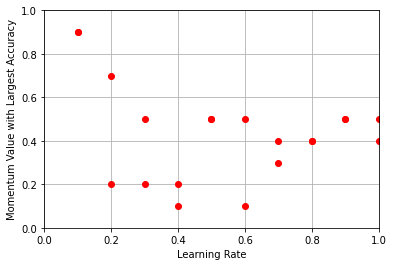

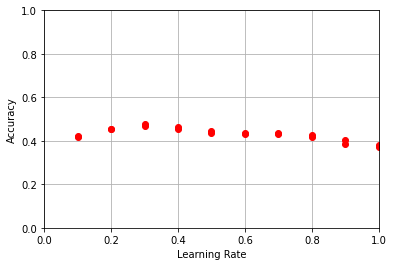

In [19]:
fig, ax = pyplot.subplots()
ax.plot(mat_lr, mat_moment, 'ro')
ax.axis([0, 1, 0, 1])
ax.set(xlabel='Learning Rate', ylabel='Momentum Value with Largest Accuracy')
ax.grid()
pyplot.show()

fig, ax = pyplot.subplots()
ax.plot(mat_lr, mat_acc, 'ro')
ax.axis([0, 1, 0, 1])
ax.set(xlabel='Learning Rate', ylabel='Accuracy')
ax.grid()
pyplot.show()

Overall Kernel_sizing seemed to be fine where it was at, at Kernel_size = 3. Adding extra Conv2D and ReLu() fully connected layers seems to have caused greater loss and a lower accuracy score than when only using 3 conv layers.

From the plot above. We got our best accuracy, 0.47695312, with a learning rate of 0.3 and a momentum of 0.2. In the graphs above, every LR has two dots since there is 2 epochs. Compared to adjusting Kernel_size and convolution layers, adjusting LR and Momentum seems to have the most significant effects.